# FVMBV - Advanced Methods of Medical Image Analysis
## Exercise 1 - Energy Minimisation for Image and Graph Smoothing

In [ ]:
# Download the data:
!wget https://cloud.imi.uni-luebeck.de/s/fBnwQNLWXNDqsj5/download -O ct_image_pytorch.pth
!wget https://cloud.imi.uni-luebeck.de/s/nKFxxNoCCpkTpy7/download -O ct_image_jit.pth
!wget https://cloud.imi.uni-luebeck.de/s/kkHziQ8iribHdTG/download -O graph_s_data_jit.pth
!wget https://cloud.imi.uni-luebeck.de/s/snYcKfrr54d53S7/download -O graph_s_data_pytorch.pth

In [2]:
# run imports
import torch
import matplotlib.pyplot as plt

### Task 1 - Sparse Laplacian matrix for edge preserving filtering

In [3]:
# given: function for conjugate gradient

def sparseCG(A,b,iterations): #A sparse matrix, b dense vector
#conjugate gradient https://william-dawson.github.io/blog/method/2017/10/01/matrixcg.html
    x = torch.zeros(b.numel(),1).to(A.device)
    r = b.view(-1,1) - torch.spmm(A,x)
    p = r.clone()
    for i in range(iterations):
        Ap = torch.spmm(A,p)
        top = (r*r).sum()
        bottom = (p*Ap).sum()
        alpha = top / (bottom+0.0001)
        x = x + alpha * p
        r = r - alpha * Ap

        new_top = (r*r).sum()
        beta = new_top/(top+0.0001)
        p = r + beta * p
    return x

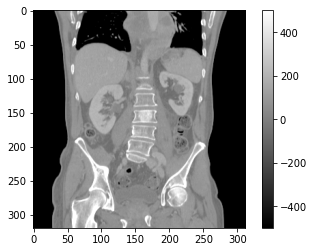

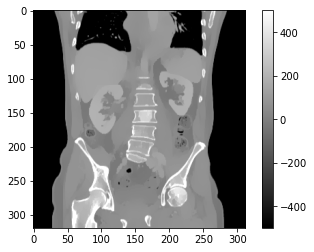

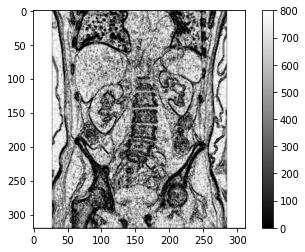

In [4]:
# load data
img = torch.load('ct_image_pytorch.pth').squeeze()

lambda_ = 200
sigma = 0.06
H,W = img.size()

# todo: create range tensor xy 
xy = torch.arange(H*W).view(H,W)

# todo: compute edge preserving weights
val = 
# todo: generate index tensor ii by appropriately slicing in x and y direction respectively
ii = 
# todo: compute first sparse matrix of size H*W,H*W with the weights calculated above
weight = 
# todo: flip the direction of the edges and add a second sparse matrix to the initial one 
weight += 

# todo: create and add sparse matrices by slicing xy in the first dimension
val = 
ii = 
weight += 
weight += 

# todo: use torch.sparse.sum to compute diagonal elements
diag = 
# todo: Create Laplacian matrix L with positive main diagonal elements (plus identity!) and negative weights
L = 

# given: solve equation system
x = sparseCG(L,img.reshape(-1,1),lambda_)

# given: visualize input, resulting images
plt.imshow(torch.clamp(img.reshape(-1,W).data,-500,500),'gray'), plt.colorbar()
plt.show()
plt.imshow(torch.clamp(x.reshape(-1,W).data,-500,500),'gray'), plt.colorbar()
plt.show()
plt.imshow(torch._sparse_sum(weight,0).to_dense().view(-1,W),'gray'), plt.colorbar()
plt.show()

### Task 2 - Denoising on irregular graph

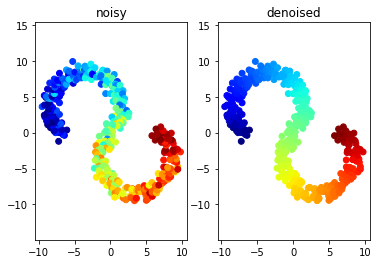

In [6]:
# load and unpack data
data = torch.load('graph_s_data_pytorch.pth')
x = data['x']
y = data['y']
values = data['values']
n = x.size(0)
xy = torch.stack((x,y),1)

order_noise = torch.zeros(n)
order_noise[torch.sort(values)[1]] = torch.linspace(0,1,n)

# todo: compute distances of xy-coordinates
dist = 

# todo: find the 16th smallest value per row/col using topk 
val_knn, idx_knn = 
val16 = 

# todo: construct laplace matrix (dense is fine)
laplace = 

# todo: set elements having distances larger than 16th smallest value to zero
laplace[...] = 0
laplace[...] = 0

# todo: add identity to laplace matrix
laplace += 

# todo: estimate main diagonal of laplace matrix (hint: sum over first dimension)
laplace -= 

# given: solve for denoised values on graph
values_solve = torch.solve(values.reshape(-1,1),laplace*25+torch.eye(n))
values_solve = values_solve.solution
order_solve = torch.zeros(n)
order_solve[torch.sort(values_solve.squeeze(1))[1]] = torch.linspace(0,1,n)

# given: plot result
cm = plt.cm.get_cmap('jet')
plt.subplot(121), plt.axis('equal'), plt.title('noisy')
plt.scatter(x,y,c=order_noise.numpy(),vmin=0,vmax=1,s=35,cmap=cm)
plt.subplot(122), plt.axis('equal'), plt.title('denoised')
plt.scatter(x,y,c=order_solve.numpy(),vmin=0,vmax=1,s=35,cmap=cm)
plt.show()
